IMPORT MODULES

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats

CONSTANTS

In [14]:
global m_0, c
#H_0 = 75 * 10**3 / (3.086*10**22) # s^-1
m_0 = -20.45
c = 299792458 # m/s
H_0 = 70*10**-3 #m s^-1 pc^-1

READ DATA

In [15]:
#reads data
data = functions.read_data('sn_data_extended.txt')
name, redshift, distance_modulus, dm_err = data[0], data[1], data[2], data[3]

In [16]:
#chi squared fitting
"""low_redshift_indices = np.where(redshift<0.1)[0]

xval = redshift[low_redshift_indices]
yval = distance_modulus[low_redshift_indices]
yerr = dm_err[low_redshift_indices]

def model_funct(x, *vals):
    return 5*np.log10((1+x)*c*x/vals[0]) - 5

initial = np.array([75.0 * 10**3 / (3.086*10**22)]) # Initial guess for fit parameters

plt.rcParams.update({'font.size': 16})

parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial,
                                               xlabel = 'Redshift $z$', 
                                               ylabel = 'Distance Modulus $m - M$') #optimised parameters given in erg/s/Ang
H_0 = parameters[0][0] #* 10**-3 * 10**6
H_0_err = parameters[1][0] #* 10**-3 * 10**6

print(H_0)
print(H_0_err)"""

"low_redshift_indices = np.where(redshift<0.1)[0]\n\nxval = redshift[low_redshift_indices]\nyval = distance_modulus[low_redshift_indices]\nyerr = dm_err[low_redshift_indices]\n\ndef model_funct(x, *vals):\n    return 5*np.log10((1+x)*c*x/vals[0]) - 5\n\ninitial = np.array([75.0 * 10**3 / (3.086*10**22)]) # Initial guess for fit parameters\n\nplt.rcParams.update({'font.size': 16})\n\nparameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial,\n                                               xlabel = 'Redshift $z$', \n                                               ylabel = 'Distance Modulus $m - M$') #optimised parameters given in erg/s/Ang\nH_0 = parameters[0][0] #* 10**-3 * 10**6\nH_0_err = parameters[1][0] #* 10**-3 * 10**6\n\nprint(H_0)\nprint(H_0_err)"

Calculate Ω_Λ,0 (k=0)

Automated method

k=-1
DoF = 578


C:\Users\bradl\AppData\Local\Temp\ipykernel_20752\55413866.py:27: RuntimeWarning: invalid value encountered in scalar power
  R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5


Optimised parameters =  [0.72220567 0.27779202] 

Covariance matrix = 
 [[ 0.00070498 -0.00047501]
 [-0.00047501  0.00034462]]


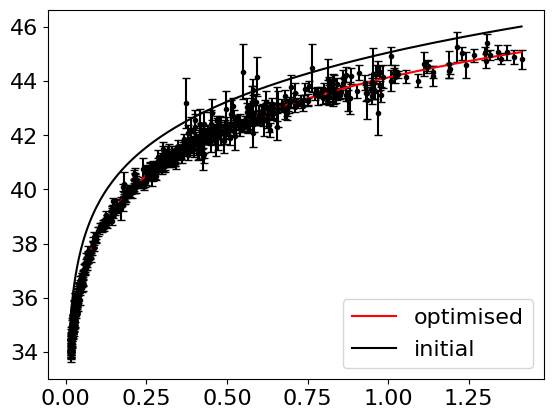

chi^2_min = 562.2267131874578
reduced chi^2 = 0.9727105764488889
$P(chi^2_min, DoF)$ = 0.6731233921550448


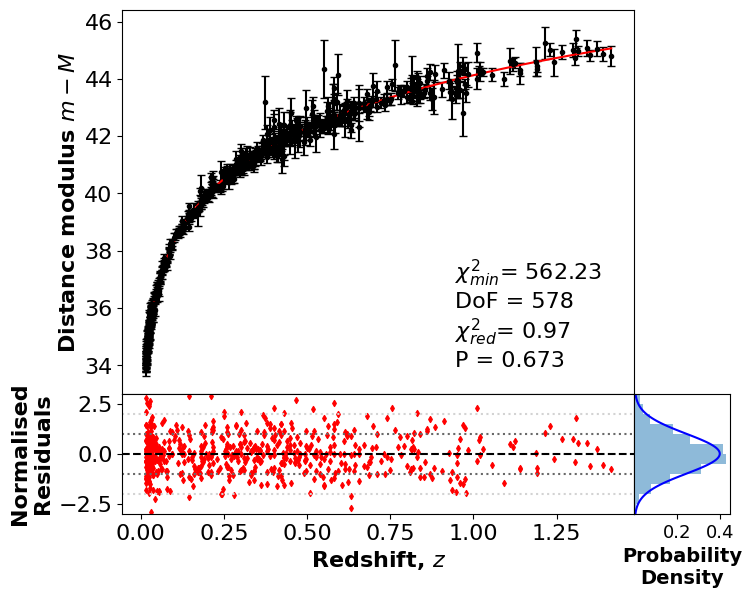

optimised parameter[0] = 0.7222056703077325 +/- 0.02655145931754529
optimised parameter[1] = 0.27779202136454273 +/- 0.018563957425999065
omega_TOT = 0.9999976916722753 +/- 0.03239753859794859
k=0
DoF = 579
Optimised parameters =  [0.72228644] 

Covariance matrix = 
 [[0.00017383]]


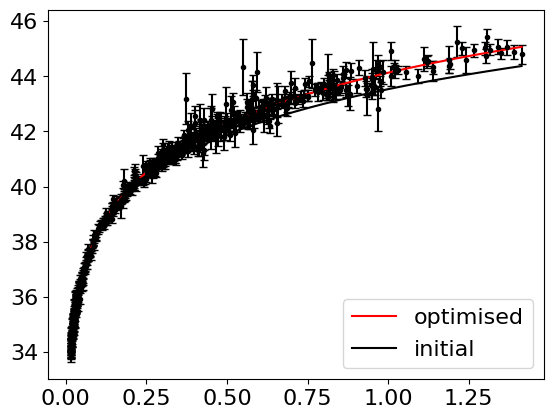

chi^2_min = 562.2266769785108
reduced chi^2 = 0.9710305301874107
$P(chi^2_min, DoF)$ = 0.6837134827055478


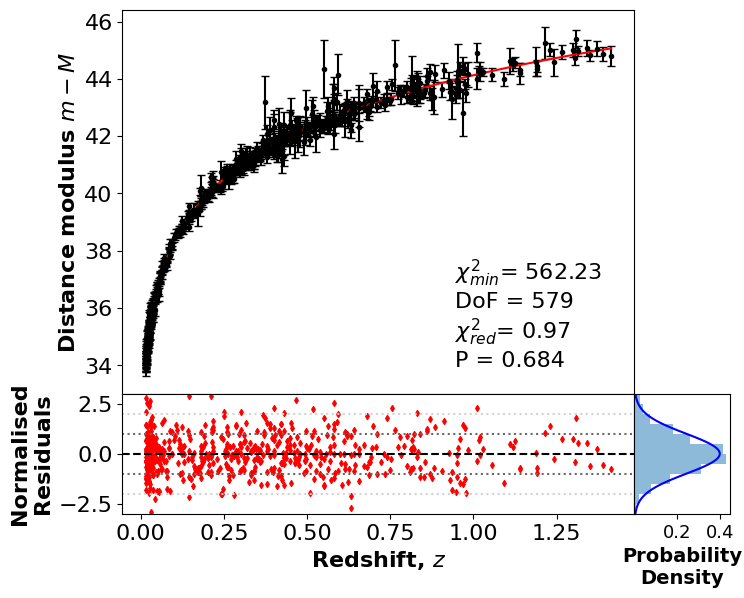

optimised parameter[0] = 0.7222864432843606 +/- 0.013184588636482664
k=1
DoF = 578


C:\Users\bradl\AppData\Local\Temp\ipykernel_20752\55413866.py:24: RuntimeWarning: invalid value encountered in scalar power
  R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5


Optimised parameters =  [0.72245707 0.27761686] 

Covariance matrix = 
 [[ 0.00070478 -0.00047484]
 [-0.00047484  0.00034448]]


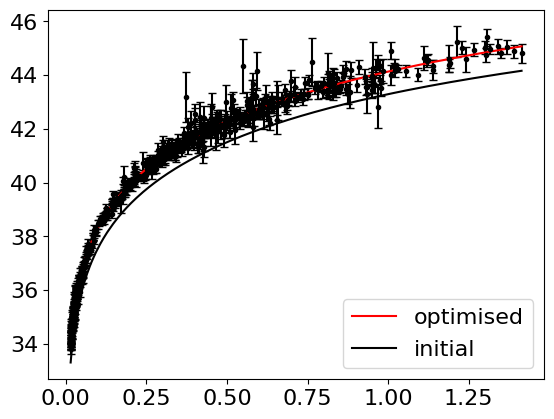

chi^2_min = 562.2266220146591
reduced chi^2 = 0.9727104187104829
$P(chi^2_min, DoF)$ = 0.6731243774912405


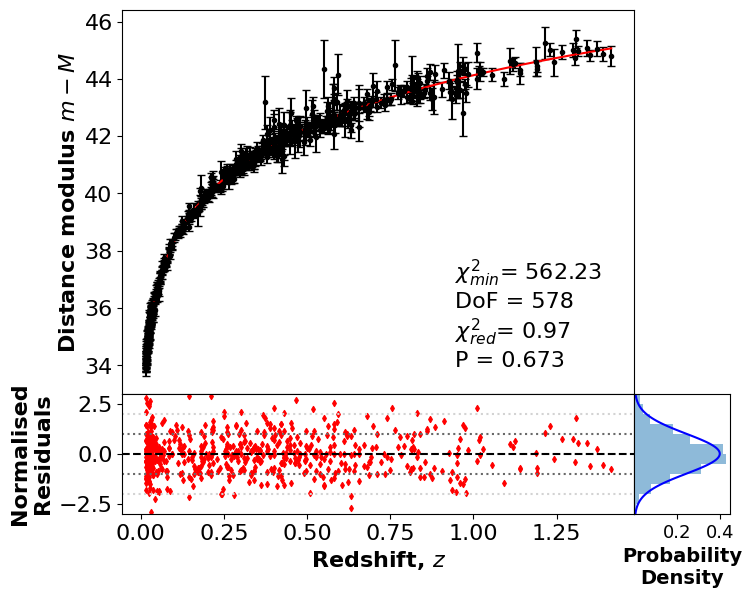

optimised parameter[0] = 0.7224570733978274 +/- 0.0265477841826606
optimised parameter[1] = 0.27761685704388556 +/- 0.01856012631156591
omega_TOT = 1.000073930441713 +/- 0.03239233140282443


In [17]:
#chi squared fitting

xval = redshift
yval = distance_modulus
yerr = dm_err

plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

def model_funct(xs, *vals):
    try:
        if k==0:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(H_0, k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]
        else:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(H_0, k, vals[0], vals[1]))[0]) for x in xs.tolist()]
    except:
        if k==0:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(H_0, k, vals[0], 1-vals[0]))[0])
        else:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(H_0, k, vals[0], vals[1]))[0])

    if k == 0:
        return 5*np.log10((1+xs)*r_c)-5
    elif k == 1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c)/R_0))-5
    elif k == -1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sinh(np.array(r_c)/R_0))-5

initials = [np.array([0.02, 0.3]), np.array([0.05]), np.array([1.5, 0.51])] # Initial guess for fit parameters
ks = [-1, 0, 1]

for i in range(0, len(ks)):
    k = ks[i]
    print(f'k={k}') 
    initial = initials[i]
    parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
    if k == 1 or k==-1:
        print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

        print("look how fuming he is")


3 parameter fitting

k=-1
DoF = 577


C:\Users\bradl\AppData\Local\Temp\ipykernel_20752\1360709988.py:27: RuntimeWarning: invalid value encountered in scalar power
  R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5


Optimised parameters =  [0.72215361 0.27758741 0.07001118] 

Covariance matrix = 
 [[ 0.09292737  0.01314884 -0.00362803]
 [ 0.01314884  0.00235669 -0.00053594]
 [-0.00362803 -0.00053594  0.00014273]]


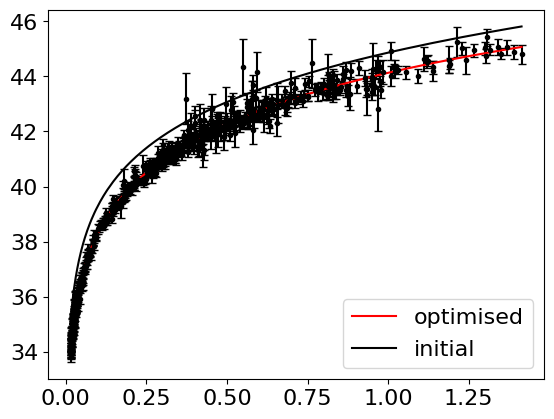

chi^2_min = 562.2266457093773
reduced chi^2 = 0.9743962663940681
$P(chi^2_min, DoF)$ = 0.6623868702970617


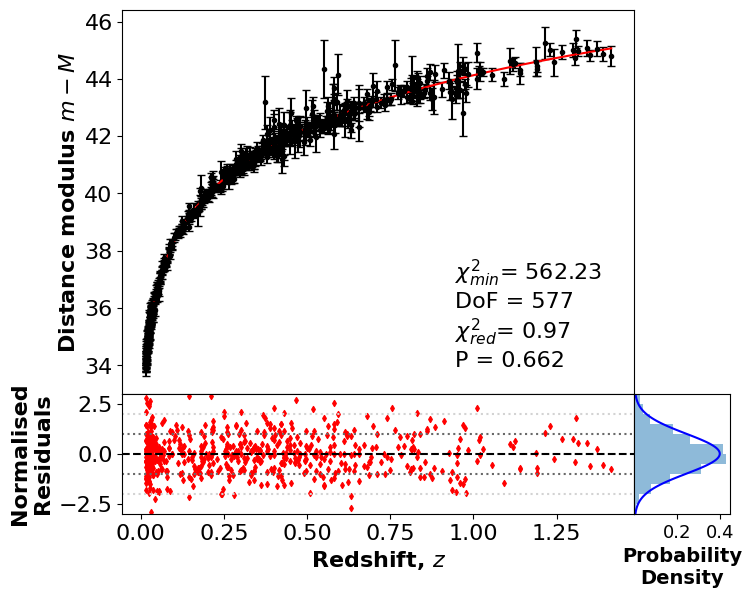

optimised parameter[0] = 0.7221536051375115 +/- 0.30483991399487537
optimised parameter[1] = 0.27758740797572984 +/- 0.048545740699039275
optimised parameter[2] = 0.07001118376092723 +/- 0.01194677924379414
omega_TOT = 0.9997410131132414 +/- 0.3086811657753375
k=0
DoF = 578
Optimised parameters =  [0.72238781 0.07000242] 

Covariance matrix = 
 [[3.79414783e-04 4.89998897e-06]
 [4.89998897e-06 1.16756868e-07]]


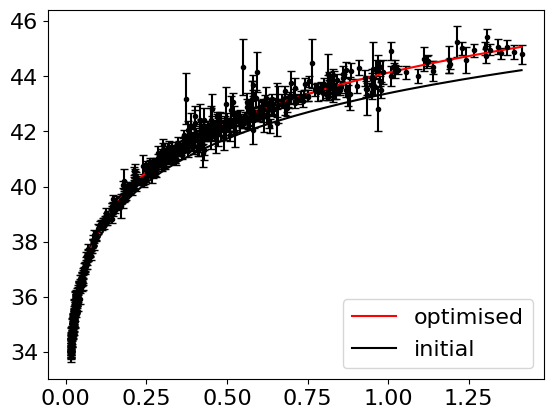

chi^2_min = 562.2266269889536
reduced chi^2 = 0.9727104273165288
$P(chi^2_min, DoF)$ = 0.6731243237323357


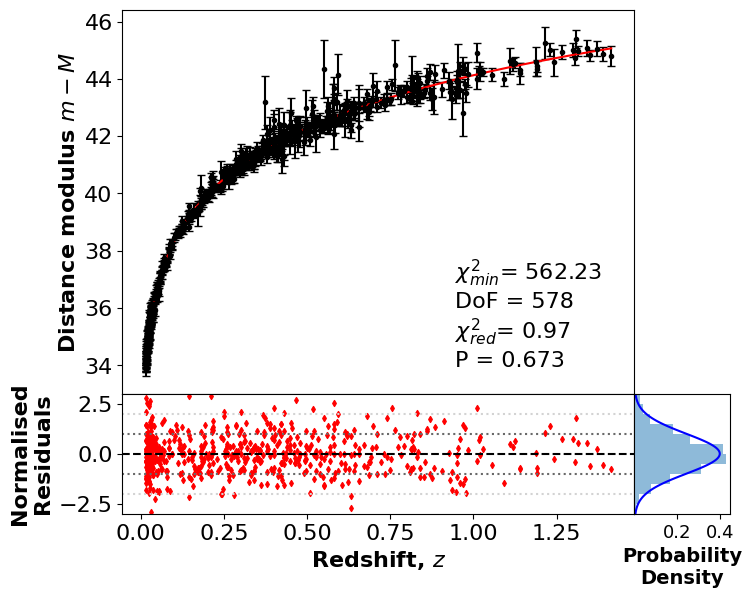

optimised parameter[0] = 0.7223878129757023 +/- 0.019478572416285124
optimised parameter[1] = 0.07000241600738048 +/- 0.00034169704163350455
k=1
DoF = 577


C:\Users\bradl\AppData\Local\Temp\ipykernel_20752\1360709988.py:24: RuntimeWarning: invalid value encountered in scalar power
  R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5


Optimised parameters =  [0.72602205 0.2781405  0.06986037] 

Covariance matrix = 
 [[ 0.09290616  0.01297066 -0.00359652]
 [ 0.01297066  0.00230923 -0.00052466]
 [-0.00359652 -0.00052466  0.0001403 ]]


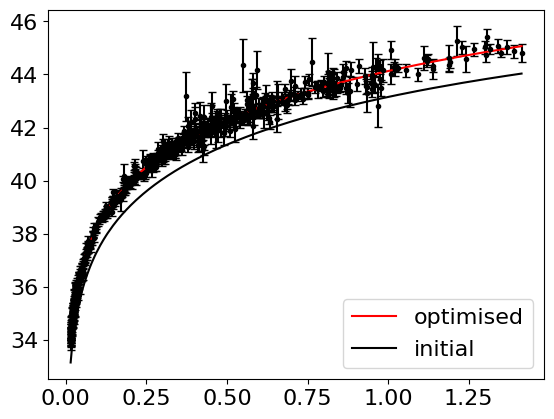

chi^2_min = 562.2264823035252
reduced chi^2 = 0.9743959831950177
$P(chi^2_min, DoF)$ = 0.6623886585554137


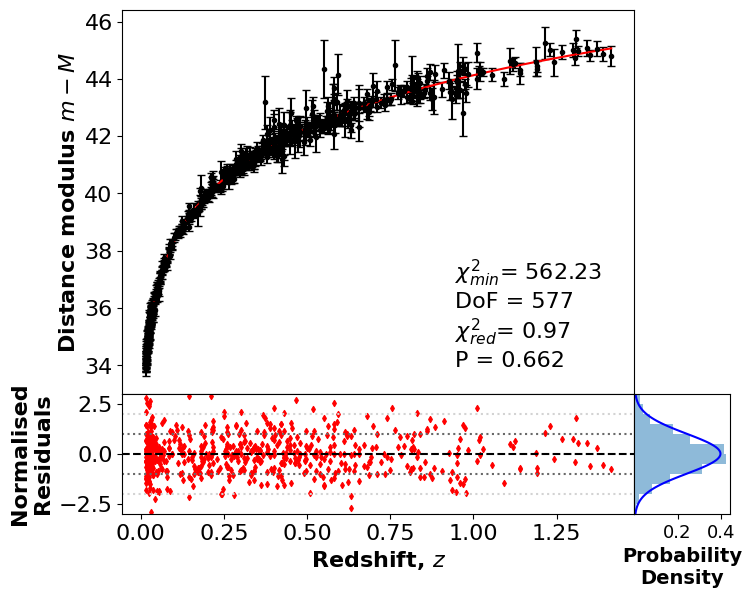

optimised parameter[0] = 0.7260220504063712 +/- 0.304805121979586
optimised parameter[1] = 0.2781405008549102 +/- 0.04805449114202806
optimised parameter[2] = 0.06986036755321105 +/- 0.011844801845199013
omega_TOT = 1.0041625512612815 +/- 0.308569921580036


In [18]:
#chi squared fitting

xval = redshift
yval = distance_modulus
yerr = dm_err

plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

def model_funct(xs, *vals):
    try:
        if k==0:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[1], k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]
        else:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[2], k, vals[0], vals[1]))[0]) for x in xs.tolist()]
    except:
        if k==0:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[1], k, vals[0], 1-vals[0]))[0])
        else:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[2], k, vals[0], vals[1]))[0])

    if k == 0:
        return 5*np.log10((1+xs)*r_c)-5
    elif k == 1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c)/R_0))-5
    elif k == -1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sinh(np.array(r_c)/R_0))-5

initials = [np.array([0.02, 0.3, 0.075]), np.array([0.05, 0.075]), np.array([1.5, 0.51, 0.075])] # Initial guess for fit parameters
ks = [-1, 0, 1]

for i in range(0, len(ks)):
    k = ks[i]
    print(f'k={k}') 
    initial = initials[i]
    parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
    if k == 1 or k==-1:
        print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0][0:2]), np.sqrt(np.sum(parameters[1][0:2]**2))))

0.5043


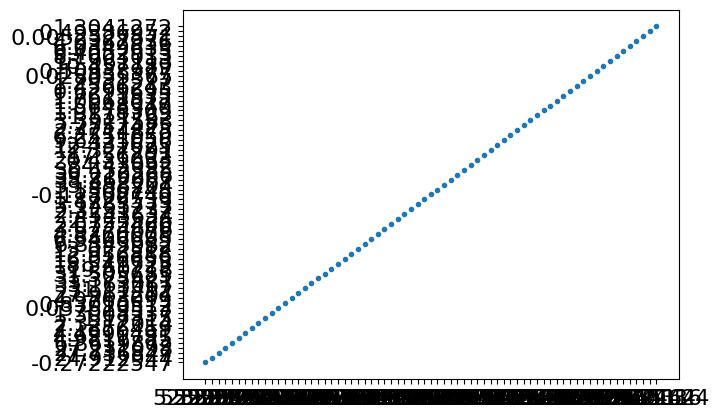

In [64]:
#ascii python reader for table
alldata = np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 26)
redshift = float(np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 3, max_rows=1)[1])
time = alldata[:, 0]
flux = alldata[:, 1]
plt.scatter(time, flux)
print(redshift)